In [1]:
import torch
from transformers import GPT2Model, GPT2Tokenizer
import matplotlib.pyplot as plt

torch.Size([1, 12, 9, 9])


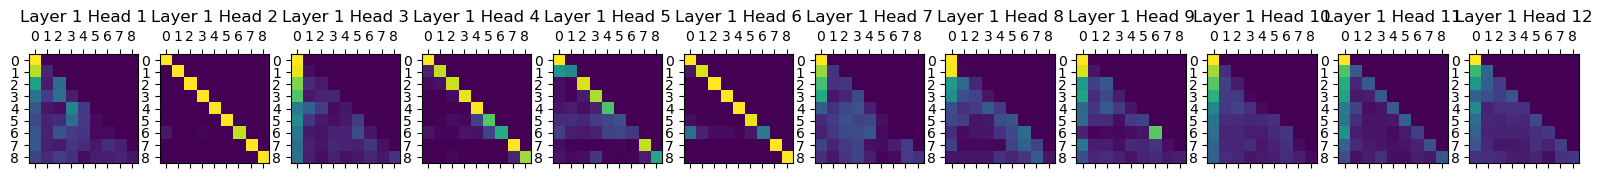

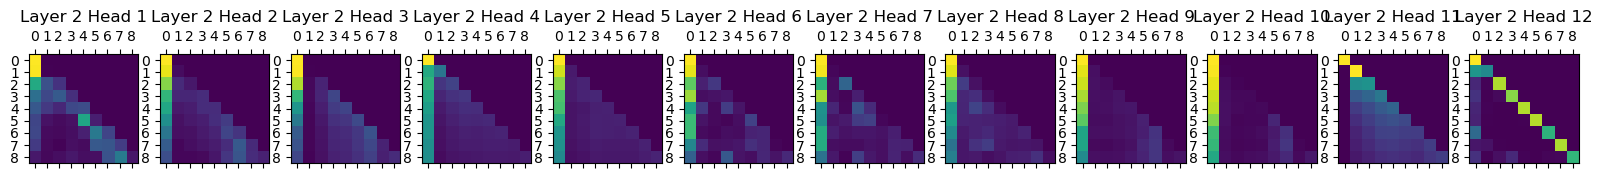

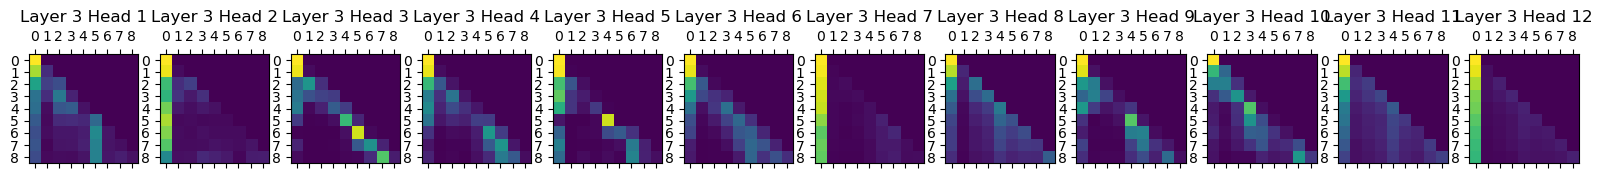

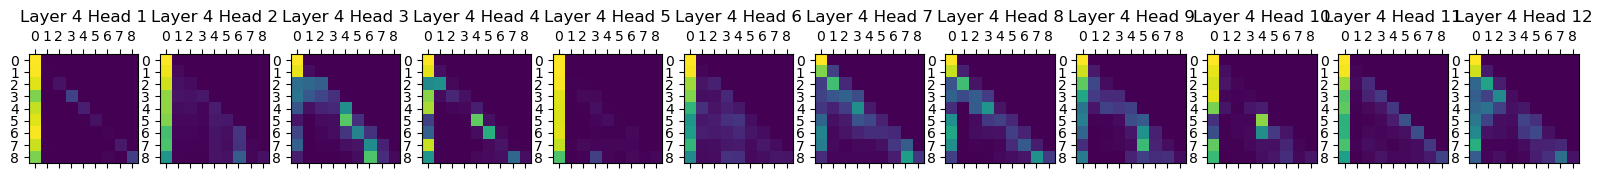

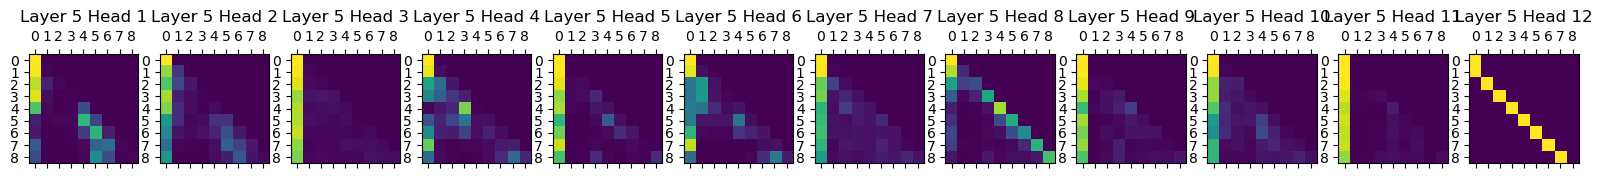

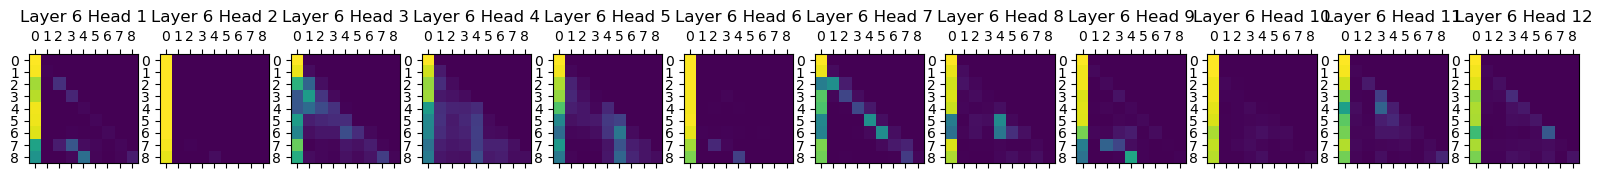

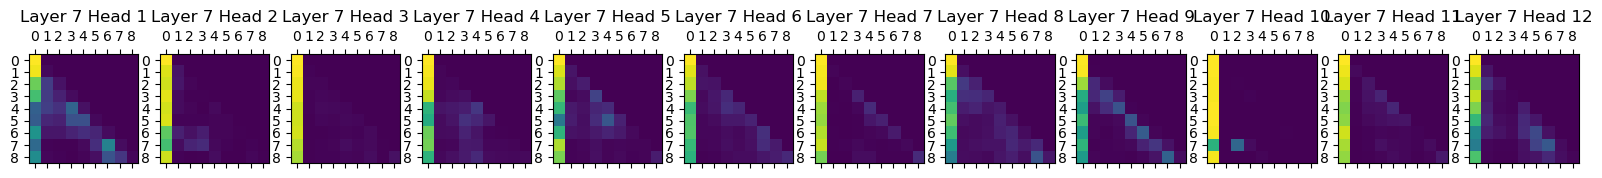

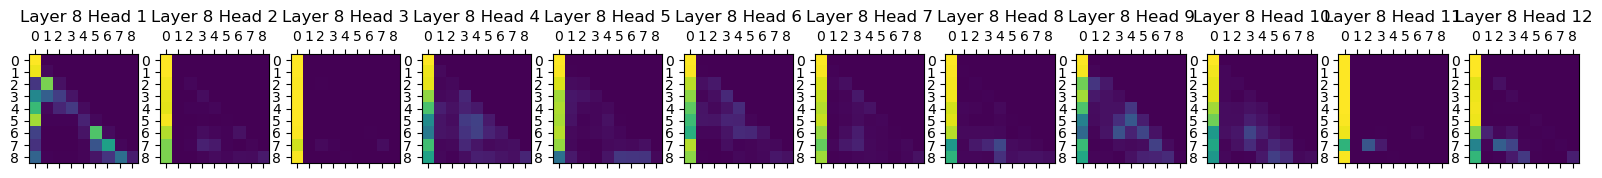

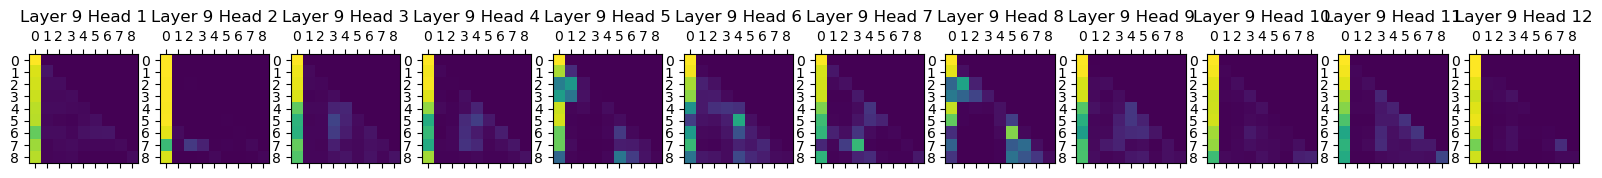

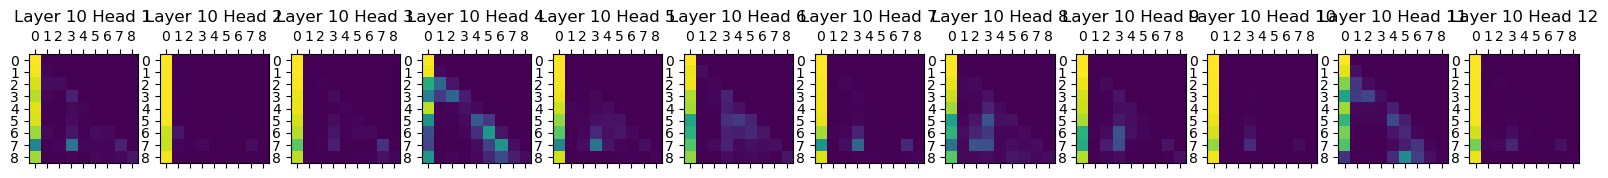

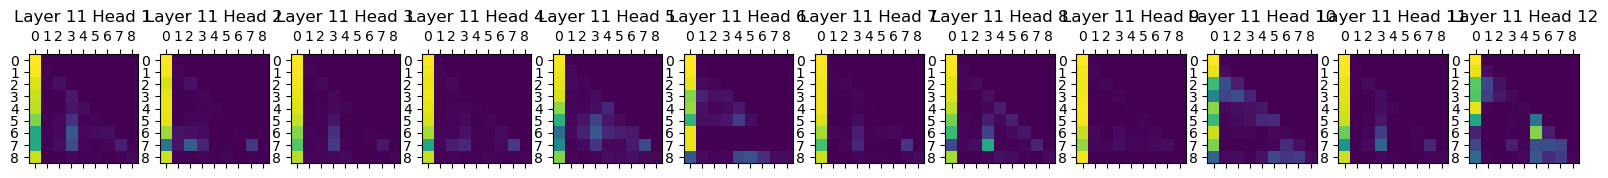

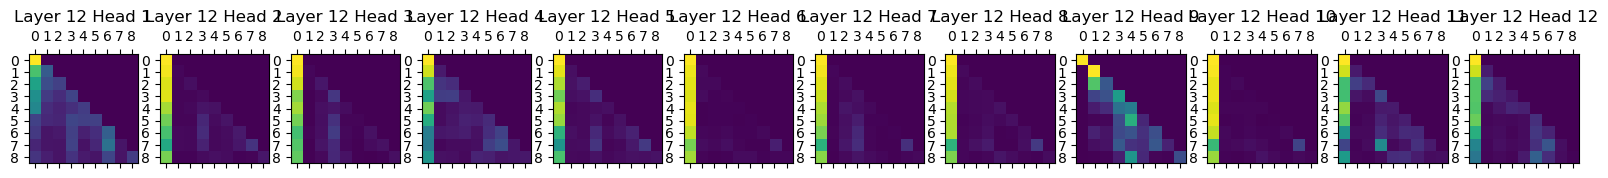

In [8]:
# Function to load the model
def load_model(model_name='gpt2'):
    model = GPT2Model.from_pretrained(model_name, output_attentions=True)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    return model, tokenizer

# Function to get self-attention maps
def get_attention_maps(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    attentions = outputs.attentions  # Get the attention maps
    print(attentions[0].shape)
    return attentions, inputs

# Function to plot the attention maps
def plot_attention_maps(attention_maps):
    num_layers = len(attention_maps)
    for layer in range(num_layers):
        num_heads = attention_maps[layer].size(1)
        fig, axs = plt.subplots(1, num_heads, figsize=(20, 2))
        for head in range(num_heads):
            axs[head].matshow(attention_maps[layer][0, head].detach().numpy(), cmap='viridis')
            axs[head].set_title(f'Layer {layer+1} Head {head+1}')
        plt.show()

# Load the model
model, tokenizer = load_model()

# Example text
text = "The quick brown fox jumps over the lazy dog"

# Get the attention maps
attention_maps, inputs = get_attention_maps(model, tokenizer, text)

# Plot the attention maps
plot_attention_maps(attention_maps)

In [7]:
attention_maps[0]

tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [8.9598e-01, 1.0402e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [5.7081e-01, 7.5315e-02, 3.5388e-01, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [3.7545e-01, 1.8634e-01, 3.6048e-01, 7.7734e-02, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [2.7033e-01, 6.2315e-02, 4.0589e-02, 4.5584e-01, 1.7093e-01,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [2.2397e-01, 1.0015e-01, 1.2125e-01, 3.5604e-01, 1.6737e-01,
           3.1227e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [2.6446e-01, 9.4461e-02, 2.5332e-01, 1.7952e-01, 1.5706e-01,
           2.6026e-02, 2.5146e-02, 0.0000e+00, 0.0000e+00],
          [2.7269e-01, 8.7970e-02, 6.8828e-02, 1.5548e-01, 1.2835e-01,
           6